Phase 0 - accessing google drive and (eventually) unzipping file


In [1]:
# we mount our google drive space
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ---- OPTIONAL
# in case we need to unzip the file
# i change current directoy with magic command
# %cd /content/drive/MyDrive/Colab Notebooks
# these are worth a look
#%lsmagic
#%who
# just checking
#%pwd

# unzipping file with executing system command
# !unzip Churn_Banking_Modeling.zip

/content/drive/MyDrive/Colab Notebooks
unzip:  cannot find or open Churn_Banking_Modeling.zip, Churn_Banking_Modeling.zip.zip or Churn_Banking_Modeling.zip.ZIP.


# Phase 1 - Data preparation

In [2]:
import pandas as pd
import numpy as np
# importing data from text file
# If we don't provide the right "encoding" parameter to the read_csv function we will get errors.
# tip: opening the csv file in a text editor may be of help in determining which is the econding of the file itself
# another way is to look for a python library that does it for us. You could check the "chardet" package.
# here a tutorial
# https://www.kaggle.com/code/rtatman/automatically-detecting-character-encodings
# dataset=pd.read_csv("/content/drive/MyDrive/Churn_Banking_Modeling.csv", sep=",", encoding=("ISO-8859-1"))
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/00 - Lecture prototypes/2023_01 - churn banking lecture/Churn_Banking_Modeling_ENG.csv")



In [ ]:
dataset

In [3]:
# the target variable is key for our analysis
# we want it to be named as "Target"
# so we rename it
# Here the details
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
dataset = dataset.rename(columns={'flag_request_closure': 'Target'})

In [4]:
# We want the target variable values to be either 0 or 1
# that helps during model training and evaluation
# so we recode target variable
# here the details about the replace method
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
dataset.replace({'Target':{"si":1}},inplace=True)
dataset.replace({'Target':{"no":0}},inplace=True)

<ipython-input-4-26fe008acad7>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Target':{"no":0}},inplace=True)


In [ ]:
# we have a look at the variable names
dataset

,customer_id,Target,amt_cust_value,flag_online_acc_opening,flag_mult_account_ownership,num_age,str_prov_domicile,str_prov_residence,num_year_first_account,str_profession,...,amt_current_liquidity,amt_current_managed,amt_current_administered,amt_6m_current_liquidity,amt_6m_current_managed,amt_6m_current_administered,flag_outgoing_sec_tranfer,flag_card_rejection,flag_loan_rejection,flag_deactivation_rid
0,2,0,65.03,0,0,38.0,BO,BO,2004.0,Impiegato,...,1634.57,2978.40,2980.92,1550.44,2853.20,2853.22,0,0,0,0
1,3,0,138.88,0,0,45.0,SA,SA,2000.0,Impiegato,...,11918.26,NaN,34916.15,26122.17,NaN,22053.82,0,0,0,0
2,4,0,546.54,0,0,61.0,VT,VT,2005.0,Altro/Nessuno,...,2671.95,NaN,232776.62,16545.25,NaN,216304.33,1,0,0,0
3,5,0,68.69,0,0,33.0,MI,MI,2010.0,Impiegato,...,19211.31,15013.53,15017.53,12500.00,NaN,NaN,0,0,0,0
4,7,0,2417.05,0,0,36.0,MI,MI,2001.0,Quadro,...,1526.38,NaN,NaN,1427.70,NaN,21514.60,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377364,555146,0,5317.47,1,0,49.0,NaN,NaN,2008.0,Avvocato,...,27933.94,197987.97,239399.96,31673.56,243236.45,285346.45,0,0,0,0
377365,555147,0,17.35,0,0,42.0,CT,CT,2002.0,Docente/Insegnante,...,-909.87,NaN,NaN,-2782.54,NaN,1098.68,0,0,0,0
377366,555148,0,334.73,0,0,54.0,RM,BZ,2001.0,Medico/Farmacista,...,72535.85,NaN,15017.53,66142.32,NaN,15208.61,0,0,0,0
377367,555149,0,5171.38,0,0,60.0,GE,GE,2007.0,Libero professionista/Titolare di impresa,...,115.87,338644.32,339296.07,154.64,276199.41,276199.47,0,0,0,0


In [ ]:
# for sake fo simplicity
# here we choose to just work on numerical variables
# var_to_use = ['Target', 'Imp_Valore_del_Cliente',
#        'Flag_Apertura_Conto_Online', 'Flag_Possesso_piu_Conti', 'Eta',
#        'Anno_Apertura_primo_Conto', 'Imp_Canone_Pricing_cc',
#        'Imp_Bonifici_vs_Competitors', 'Imp_Bonifici_vs_No_Competitors',
#        'Num_Utenze_in_essere', 'Flag_Accredito_Stipendio',
#        'Imp_Spending_Carta_Credito', 'Imp_Spending_Bancomat',
#        'Num_Accessi_Sito', 'Num_Movimenti_Dispositivi', 'Num_attività_trading',
#        'Var_Numero_Utenze', 'Flag_Mutuo', 'Flag_Prestito', 'Flag_Giroconto',
#        'Flag_Richiesta_info_chiusura_conto', 'Iscrizione_programma_Loyalty',
#        'Flag_Contatto_Call_Center', 'Flag_variazione_Accredito_Stipendio',
#        'Num_Punti_Programma_Loyalty', 'Imp_Liquidità_Attuale',
#        'Imp_Gestito_attuale', 'Imp_Amministrato_attuale',
#        'Imp_Liquidità_Attuale_6m', 'Imp_Gestito_attuale_6m',
#        'Imp_Amministrato_attuale_6m', 'Flag_Trasferimento_Titoli_Out',
#        'Flag_Rifiuto_Carte', 'Flag_Rifiuto_Prestiti',
#        'Flag_Disattivazione_RID']
# len(var_to_use)

In [5]:
# for sake of simplicity
# here we choose to just work on numerical variables
var_to_use = [
    'Target', 'amt_cust_value', 'flag_online_acc_opening',
       'flag_mult_account_ownership', 'num_age',
       'num_year_first_account',
       'amt_pricing_fee', 'amt_transfer_vs_competitors',
       'amt_tranfers_vs_no_competitors', 'num_existing_services',
       'flag_salary_deposit', 'amt_credit_card_spending',
       'amt_debit_card_spending', 'num_website_access_count',
       'num_transactions_count', 'num_trading_activities_count',
       'str_change_num_utilities', 'flag_mortgage', 'flag_loan',
       'flag_internal_tranfers', 'flag_request_info_closure',
       'flag_loyalty_program_enrol', 'flag_call_center_contact',
       'flag_salary_deposit_variation', 'num_loyalty_points',
       'amt_current_liquidity', 'amt_current_managed',
       'amt_current_administered', 'amt_6m_current_liquidity',
       'amt_6m_current_managed', 'amt_6m_current_administered',
       'flag_outgoing_sec_tranfer', 'flag_card_rejection',
       'flag_loan_rejection', 'flag_deactivation_rid'
]


In [6]:
# i like to create list with all feature names (all variables except target)
# that may be useful later in constructing training datasets
features_names =  var_to_use.copy()
features_names.remove('Target')


In [7]:
# i remove all the variables that won't be used
dataset = dataset[var_to_use].copy() # why do we use .copy()?


In [8]:
# impute all missing values to zero
# here some detail about the fillna method
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
dataset[features_names] = dataset[features_names].fillna(0)


In [9]:
# create the "features" dataframe with just feature variables (remove target)
# we use the "drop" method
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
features = dataset.drop('Target', axis = 1)

In [10]:
# create array with target variable
# we access the DataFrame "values" attribute
target = dataset[['Target']].values

In [ ]:
dataset

,Target,amt_cust_value,flag_online_acc_opening,flag_mult_account_ownership,num_age,num_year_first_account,amt_pricing_fee,amt_transfer_vs_competitors,amt_tranfers_vs_no_competitors,num_existing_services,...,amt_current_liquidity,amt_current_managed,amt_current_administered,amt_6m_current_liquidity,amt_6m_current_managed,amt_6m_current_administered,flag_outgoing_sec_tranfer,flag_card_rejection,flag_loan_rejection,flag_deactivation_rid
0,0,65.03,0,0,38.0,2004.0,0.000000,0.000,812.800000,3.0,...,1634.57,2978.40,2980.92,1550.44,2853.20,2853.22,0,0,0,0
1,0,138.88,0,0,45.0,2000.0,0.000000,6260.820,828.120000,7.0,...,11918.26,0.00,34916.15,26122.17,0.00,22053.82,0,0,0,0
2,0,546.54,0,0,61.0,2005.0,0.000000,4330.000,1076.666666,9.0,...,2671.95,0.00,232776.62,16545.25,0.00,216304.33,1,0,0,0
3,0,68.69,0,0,33.0,2010.0,0.000000,0.000,0.000000,0.0,...,19211.31,15013.53,15017.53,12500.00,0.00,0.00,0,0,0,0
4,0,2417.05,0,0,36.0,2001.0,0.000000,0.000,1200.000000,0.0,...,1526.38,0.00,0.00,1427.70,0.00,21514.60,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377364,0,5317.47,1,0,49.0,2008.0,0.000000,13.005,19524.800000,0.0,...,27933.94,197987.97,239399.96,31673.56,243236.45,285346.45,0,0,0,0
377365,0,17.35,0,0,42.0,2002.0,0.000000,25.900,404.823333,11.0,...,-909.87,0.00,0.00,-2782.54,0.00,1098.68,0,0,0,0
377366,0,334.73,0,0,54.0,2001.0,0.000000,926.615,3237.045000,8.0,...,72535.85,0.00,15017.53,66142.32,0.00,15208.61,0,0,0,0
377367,0,5171.38,0,0,60.0,2007.0,0.000000,0.000,0.000000,0.0,...,115.87,338644.32,339296.07,154.64,276199.41,276199.47,0,0,0,0


# Phase 2 - Modeling

## Modeling - Part 1 - First attempt - We just model data as it is

In [ ]:
# The Pandas package is for data manipulation
# when it's about modeling we need another one
# the scikit-learn is probably the most popular one
# https://scikit-learn.org
# we will import all the objects we need for modeling from it

In [11]:
# in order to prevent overfitting
# we generate train and test sample
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
(train_X, test_X, train_y, test_y) = train_test_split(features, target, train_size=0.7, random_state=1)
# suggestion: have a look at shapes of such datasets

In [12]:
# Let's have a look at the target variable
# we can do it by making use of some package that was made for it
from collections import Counter
print("train target count : ", Counter(train_y[:,0]))
# can be done in many ways
# unique, counts = np.unique(train_y[:,0], return_counts=True)

# let's look at results:  ring any bell?


train target count :  Counter({0: 262759, 1: 1399})


In [13]:
# we start training a tree
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
# we instantiate  the classifier
dtc = DecisionTreeClassifier()
# we train it
dtc.fit(train_X, train_y)

DecisionTreeClassifier()

In [14]:
# we use the model to make predictions (and generate scores) on the test dataset
label_pred_test = dtc.predict(test_X)
score_test = dtc.predict_proba(test_X)

# (this is less useful) - predict on training dataset
label_pred_train = dtc.predict(train_X)
score_train = dtc.predict_proba(train_X)
# let's take a look at the generated scores
set(score_test[:,1])

{0.0, 0.2, 0.5, 1.0}

In [15]:
test_y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

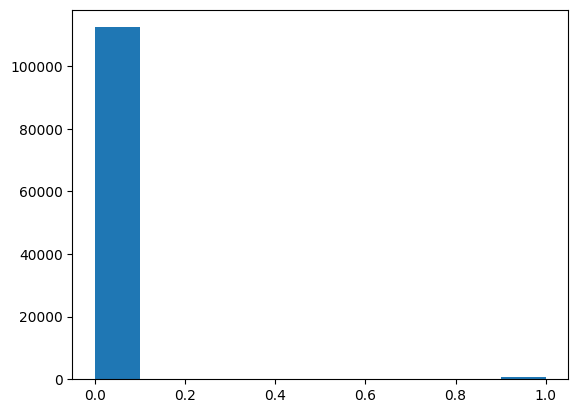

In [16]:
# let's have a look at the score distribution
# anything strange?
# we use the matplotlib library
# https://matplotlib.org/
# import the package
from matplotlib import pyplot as plt
# generate the histogram
plt.hist(score_test[:,1])
# plot it
plt.show()

col_0         0         1
row_0                    
0.0    0.995295  0.004705
0.2    1.000000  0.000000
0.5    1.000000  0.000000
1.0    0.928664  0.071336


<Axes: xlabel='row_0'>

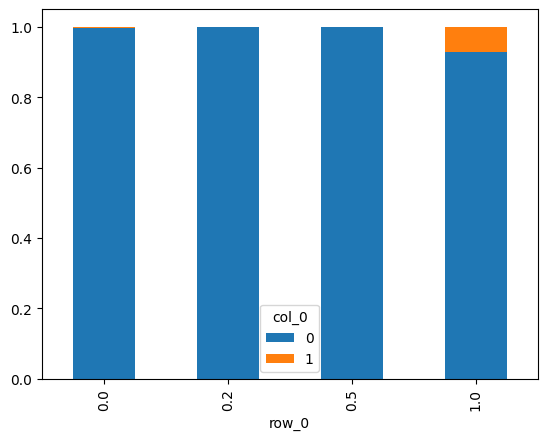

In [17]:
# let's have a deeper look at what happens
# in each score bin
# let's compute crosstab between score bins and target variable
# we then look at row marginal
score_test_analysis = pd.crosstab(score_test[:,1], test_y[:,0], normalize = 'index')
print(score_test_analysis) # what do we see?
# we can also plot
score_test_analysis.plot.bar(stacked=True)

In [18]:
# we look at confusion matrix
# https://en.wikipedia.org/wiki/Confusion_matrix
# what do you see?
from sklearn.metrics import confusion_matrix
cm_test=confusion_matrix(test_y,label_pred_test)
print(cm_test)


[[111911    716]
 [   529     55]]
